In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def model_orbit(t, state):
    mu = 3.986004418E+05  # GM_earth [km^3/s^2]
    x = state[0]
    y = state[1]
    v_x = state[2]
    v_y = state[3]
    r = -mu * (x * x + y * y) ** (-3 / 2)
    a_x = x * r
    a_y = y * r
    dstate_dt = [v_x, v_y, a_x, a_y]
    return dstate_dt

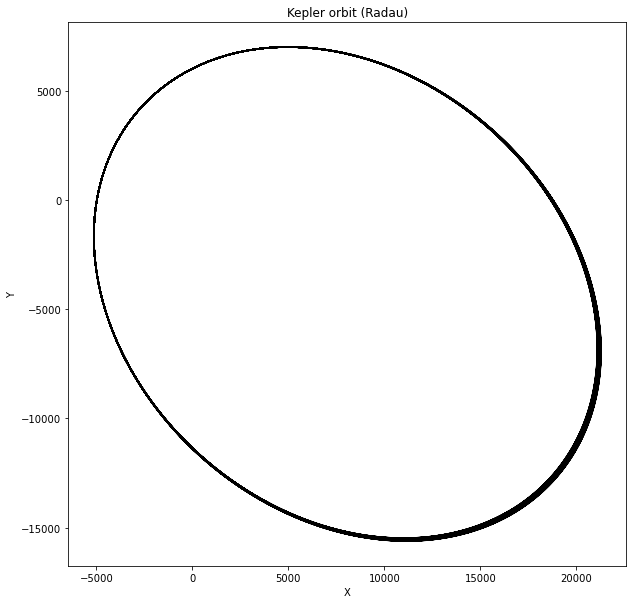

In [3]:
def solve(method):
    # Initial Conditions
    # x y z (km) v_x v_y v_z (km/s)
    state_0 = [5000.0, 7000.0, -8.0, 0.0]

    # Time Array
    t_span = [0, 200*3600]
    t = np.arange(t_span[0], t_span[1], 0.1)  # 600 hours

    # Solving ODE
    sol = solve_ivp(model_orbit, t_span, state_0, method=method, t_eval=t)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot()
    ax.plot(sol.y[0, :], sol.y[1, :], 'black')
    ax.set_title(f'Kepler orbit ({method})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.show()

# for i in ['RK45', 'RK23', 'DOP853', 'DOP853', 'Radau', 'BDF', 'LSODA']:
#     solve(i)
solve('Radau')

In [4]:
def solve(method):
    # Initial Conditions
    # r, o, do
    state_0 = [0*np.pi, 6400000]
    
    m = 1
    r = 6400000
    v = 800
    r = 6400000
    L = r * m * v
    GM = 3.986004e+3
    E0 = m * v * v / 2 - GM / r
    print(L, GM, E0)
    # Time Array
    t_span = [0, 1*3600]
    t = np.arange(t_span[0], t_span[1], 0.1)  # 600 hours

    # Solving ODE
    sol = solve_ivp(model_orbit, t_span, state_0, method=method, t_eval=t, args=(L, GM, E0))
    print(sol.y)
    #fig = plt.figure(figsize=(10, 10))
    #ax = fig.add_subplot()
    #plt.polar(sol.y[0, :], sol.y[1, :], 'black')
    plt.plot(sol.t, sol.y[1, :])
    #ax.set_title(f'Kepler orbit ({method})')
    #ax.set_xlabel('X')
    #ax.set_ylabel('Y')

    #plt.show()

57600000000 398600400000000.0 -21781312.5
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.5578603446483612 -43562625.0 124562623.14387228 80999997.58601193
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 81000000.0
0.0 -43562625.0 124562625.0 8100

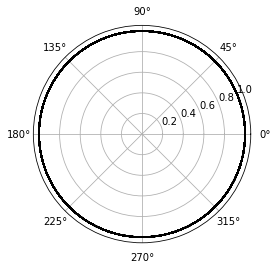

In [5]:
def solve(method):
    # Initial Conditions
    # r, o, do
    state_0 = [0.1*np.pi, 6400000]
    
    r = 6400000
    v = 9000
    r = 6400000
    L = r * v
    #GM = 3.986004e+14
    GM = 3.986004e+14
    E0 = v * v / 2 - GM / r
    print(L, GM, E0)
    # Time Array
    t_span = [0, 1*3600]
    t = np.arange(t_span[0], t_span[1], 0.1)  # 600 hours

    # Solving ODE[ (-6<a[:,1]) & (a[:,1]<3) ]
    sol = solve_ivp(model_orbit, t_span, state_0, method=method, t_eval=t, args=(L, GM, E0))
    print(sol.y)
    #fig = plt.figure(figsize=(10, 10))
    #ax = fig.add_subplot()
    o = sol.y[0, :] * (180 / np.pi)
    plt.polar(o, sol.y[1, :] / 6400000, 'black')
    #plt.plot(sol.t, sol.y[1, :], 'black')
    #plt.plot(sol.t, sol.y[0, :] * 180 / np.pi, 'red')
    #ax.set_title(f'Kepler orbit ({method})')
    #ax.set_xlabel('X')
    #ax.set_ylabel('Y')

    #plt.show()

def model_orbit(t, state, L, GM, E0):
    o = state[0]
    r = state[1]
    #H = r ** 2 * do
    #a = G * M
    #dr = r
    #ddr=H*H/r**3-a/r**2
    #do = c/r/r
    #dr*dr+r*r*do*do-n*n/r=2*h
    #dr*dr+L*L/r/r-2*GM*GM/r=2*E0
    #dstate_dt = [(2*h+2*n*n/r-c*c/r/r)**0.5, c/r/r, r]
    #print(L, GM, E0, r, o)
    print(2*E0+2*GM/r-L*L/r/r, 2*E0, 2*GM/r, L*L/r/r)
    dstate_dt = [L/r/r, (2*E0+2*GM/r-L*L/r/r)**0.5]
    return dstate_dt

# for i in ['RK45', 'RK23', 'DOP853', 'DOP853', 'Radau', 'BDF', 'LSODA']:
#     solve(i)
solve('Radau')

In [6]:
-43562625.0+124562625.0-81000000.0

0.0